### Predicting Risk based on family,health, insurance, employment attributes of applicants

#### Cleaned up Data after addressing nulls

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
nonull_train = pd.read_csv('nonull_train')
nonull_train.head()

,Unnamed: 0,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt
0,0,0.323008,0.028,12,1,0.0,3,0.2500,2,0.581818,0.641791,1,1,3,1,1,1,2,1,2,6,3,1,2,1,4.0,3,2,3,3,3,3,1,1,112,2,1,2,3,1,3,3,1,3,2,2,3,1,3,1,2,2,1,3,1,3,3,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D3,10,0.076923,2,1,1,8,0.148536
1,1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.600000,0.059701,2,1,3,1,1,3,2,1,2,6,3,1,2,1,5.0,3,2,3,3,1,3,1,1,412,2,1,2,3,1,3,3,1,3,2,2,3,3,1,1,2,2,1,3,1,3,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,A1,26,0.076923,2,3,1,4,0.131799
2,2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.745455,0.029851,2,1,1,3,3,2,3,1,2,8,3,1,1,1,10.0,3,2,3,3,1,3,1,1,3,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,E1,26,0.076923,2,3,1,8,0.288703
3,3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.672727,0.164179,2,1,1,3,3,2,3,2,2,8,3,1,2,1,0.0,3,2,3,3,1,3,1,1,350,2,2,2,3,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D4,10,0.487179,2,3,1,8,0.205021
4,4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.654545,0.417910,2,1,1,3,3,2,3,1,2,6,3,1,2,1,4.0,3,2,3,3,1,3,1,1,162,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D2,26,0.230769,2,3,1,8,0.234310


In [3]:
data_features = nonull_train
len(data_features)

59381

In [4]:
features_with_nulls = {k:v for k, v in data_features.isnull().apply(sum).to_dict().items() if v > 0}
features_with_nulls

{}

#### One-hot encode string data

In [5]:
data_binary_encoded = pd.get_dummies(data_features, columns=["Product_Info_2"])
data_binary_encoded.columns

Index(['Unnamed: 0', 'BMI', 'Employment_Info_1', 'Employment_Info_2',
       'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5',
       'Employment_Info_6', 'Family_Hist_1', 'Ht',
       ...
       'Product_Info_2_B2', 'Product_Info_2_C1', 'Product_Info_2_C2',
       'Product_Info_2_C3', 'Product_Info_2_C4', 'Product_Info_2_D1',
       'Product_Info_2_D2', 'Product_Info_2_D3', 'Product_Info_2_D4',
       'Product_Info_2_E1'],
      dtype='object', length=137)

#### Drop columns with low weights from RFC

In [6]:
data_binary_encoded.drop(['Unnamed: 0','Medical_History_33','Product_Info_2_A7','Medical_Keyword_23','Medical_Keyword_37','Medical_History_18','Medical_History_12','Medical_History_37','Medical_Keyword_11','Medical_Keyword_40','Medical_History_6','Insurance_History_2','Product_Info_2_E1','Medical_Keyword_42','Product_Info_1','Medical_History_40','Product_Info_2_A1','Medical_Keyword_48','InsuredInfo_7','Medical_History_7','Medical_Keyword_10','Medical_Keyword_1','Product_Info_2_A2','Medical_Keyword_22','Medical_History_19','Product_Info_2_A6','Medical_History_17','InsuredInfo_5','Medical_History_20','Medical_History_14','Product_Info_7','Medical_Keyword_33','Medical_History_5',
 'Medical_Keyword_47',
 'InsuredInfo_2',
 'Medical_Keyword_32',
 'Medical_Keyword_24',
 'Medical_Keyword_34',
 'Medical_History_22',
 'Medical_Keyword_30',
 'Product_Info_2_B2',
 'Product_Info_2_A3',
 'Medical_Keyword_4',
 'Medical_Keyword_28',
 'Product_Info_2_A5',
 'Medical_Keyword_26',
 'Medical_Keyword_21',
 'Medical_Keyword_7',
 'Medical_Keyword_16',
 'Medical_History_27',
 'Medical_History_31',
 'Medical_Keyword_45',
 'Medical_Keyword_6',
 'Medical_Keyword_36',
 'Medical_Keyword_31',
 'Medical_Keyword_38',
 'Medical_Keyword_39',
 'Medical_Keyword_12',
 'Medical_Keyword_29',
 'Product_Info_5',
 'Medical_Keyword_43',
 'Medical_History_11',
 'Medical_Keyword_5',
 'Medical_Keyword_27',
 'Medical_Keyword_35',
 'Medical_Keyword_41',
 'Medical_Keyword_9',
 'Medical_Keyword_19',
 'Medical_Keyword_2',
 'Medical_Keyword_17',
 'Medical_Keyword_18',
 'Product_Info_2_C1',
 'Medical_Keyword_46',
 'Medical_Keyword_8',
 'Product_Info_2_C3',
 'Medical_Keyword_44',
 'Medical_Keyword_14',
 'Medical_Keyword_20',
 'Medical_Keyword_13',
 'Medical_History_38',
 'Product_Info_2_C4',
 'Product_Info_2_C2',
 'Product_Info_2_A4',
 'Medical_History_35',
 'Product_Info_2_B1'
], axis=1, inplace=True)

In [7]:
data_binary_encoded.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_3,InsuredInfo_4,InsuredInfo_6,Medical_History_1,Medical_History_13,Medical_History_16,Medical_History_2,Medical_History_21,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_34,Medical_History_36,Medical_History_39,Medical_History_4,Medical_History_41,Medical_History_8,Medical_History_9,Medical_Keyword_15,Medical_Keyword_25,Medical_Keyword_3,Product_Info_3,Product_Info_4,Product_Info_6,Response,Wt,Product_Info_2_A8,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4
0,0.323008,0.028,12,1,0.0,3,0.2500,2,0.581818,0.641791,1,3,1,1,1,2,1,6,3,2,4.0,3,3,112,1,3,1,3,1,3,2,2,3,2,3,1,3,2,1,0,0,0,10,0.076923,1,8,0.148536,0,0,0,1,0
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.600000,0.059701,2,3,1,1,3,2,1,6,3,2,5.0,3,1,412,1,3,1,3,1,3,2,2,1,2,3,1,1,2,1,0,0,0,26,0.076923,3,4,0.131799,0,0,0,0,0
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.745455,0.029851,2,1,3,3,2,3,1,8,3,1,10.0,3,1,3,1,3,2,2,1,3,2,2,3,3,3,2,1,2,2,0,0,0,26,0.076923,3,8,0.288703,0,0,0,0,0
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.672727,0.164179,2,1,3,3,2,3,2,8,3,2,0.0,3,1,350,2,3,1,3,1,3,2,2,3,2,3,2,1,2,2,0,0,0,10,0.487179,3,8,0.205021,0,0,0,0,1
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.654545,0.417910,2,1,3,3,2,3,1,6,3,2,4.0,3,1,162,1,3,2,2,1,3,2,2,3,3,3,2,1,2,2,0,0,0,26,0.230769,3,8,0.234310,0,0,1,0,0


In [8]:
y = data_binary_encoded["Response"]
y.shape

(59381,)

In [9]:
X = data_binary_encoded
del X["Response"]

## Linear Regression

In [10]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(y)
one_hot_y.shape

Using TensorFlow backend.


(59381, 9)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, random_state=42)

X_train.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_3,InsuredInfo_4,InsuredInfo_6,Medical_History_1,Medical_History_13,Medical_History_16,Medical_History_2,Medical_History_21,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_34,Medical_History_36,Medical_History_39,Medical_History_4,Medical_History_41,Medical_History_8,Medical_History_9,Medical_Keyword_15,Medical_Keyword_25,Medical_Keyword_3,Product_Info_3,Product_Info_4,Product_Info_6,Wt,Product_Info_2_A8,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4
31548,0.395345,0.098,9,1,0.0000,2,0.25,3,0.781818,0.373134,1,3,1,1,1,2,1,8,3,1,4.0,3,1,418,1,3,1,3,1,3,2,2,1,2,3,2,1,2,2,0,0,0,26,0.230769,3,0.288703,0,0,0,0,1
6973,0.411370,0.010,9,1,0.0216,2,0.10,3,0.781818,0.656716,1,3,1,1,1,2,1,7,3,1,1.0,3,1,491,1,3,1,3,1,3,2,2,3,2,3,1,3,2,1,0,0,0,26,0.000000,3,0.299163,0,0,0,0,0
57088,0.378752,0.300,9,1,0.0000,2,1.00,3,0.763636,0.746269,1,3,1,1,1,2,1,4,2,1,1.0,3,1,181,1,3,1,3,1,3,2,2,3,2,3,1,1,2,1,0,0,0,26,1.000000,1,0.267782,0,0,1,0,0
35688,0.474329,0.200,14,1,0.0000,2,1.00,3,0.763636,0.462687,1,3,1,2,1,2,2,3,3,1,0.0,3,1,125,1,3,1,3,1,1,2,2,1,2,3,2,3,2,2,0,0,0,26,1.000000,3,0.328452,0,0,0,0,0
53528,0.725224,0.085,1,3,0.0000,2,0.10,2,0.690909,0.656716,2,1,3,3,2,3,1,11,3,2,1.0,3,1,278,1,1,1,3,1,3,2,2,3,2,3,2,1,2,1,1,0,0,26,0.128205,3,0.424686,0,0,1,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
y_train_scaled[0]

array([ 0.        , -0.33935123, -0.35176912, -0.13185124, -0.15682454,
       -0.31598557, -0.4832389 , -0.39683093,  1.42688271])

In [51]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.895143845690987, R2: -0.0011835854401477954


## Normal Neural Network 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [17]:
X_train.shape

(44535, 51)

In [18]:
y_train_categorical.shape

(44535, 8)

In [19]:
# first, create a normal neural network with 51 inputs, 60 hidden nodes, and 8 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=60, activation='relu', input_dim=51))
model.add(Dense(units=8, activation='softmax'))

In [20]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 3s - loss: 1.5047 - acc: 0.4553
Epoch 2/100
 - 3s - loss: 1.4009 - acc: 0.4883
Epoch 3/100
 - 3s - loss: 1.3705 - acc: 0.4999
Epoch 4/100
 - 2s - loss: 1.3535 - acc: 0.5078
Epoch 5/100
 - 2s - loss: 1.3434 - acc: 0.5122
Epoch 6/100
 - 2s - loss: 1.3353 - acc: 0.5166
Epoch 7/100
 - 3s - loss: 1.3282 - acc: 0.5211
Epoch 8/100
 - 2s - loss: 1.3230 - acc: 0.5222
Epoch 9/100
 - 3s - loss: 1.3183 - acc: 0.5223
Epoch 10/100
 - 3s - loss: 1.3131 - acc: 0.5258
Epoch 11/100
 - 3s - loss: 1.3086 - acc: 0.5273
Epoch 12/100
 - 3s - loss: 1.3048 - acc: 0.5284
Epoch 13/100
 - 3s - loss: 1.3014 - acc: 0.5297
Epoch 14/100
 - 3s - loss: 1.2980 - acc: 0.5314
Epoch 15/100
 - 3s - loss: 1.2952 - acc: 0.5309
Epoch 16/100
 - 3s - loss: 1.2925 - acc: 0.5324
Epoch 17/100
 - 3s - loss: 1.2892 - acc: 0.5337
Epoch 18/100
 - 3s - loss: 1.2871 - acc: 0.5361
Epoch 19/100
 - 3s - loss: 1.2847 - acc: 0.5361
Epoch 20/100
 - 3s - loss: 1.2819 - acc: 0.5380
Epoch 21/100
 - 3s - loss: 1.2798 - acc: 0.5380
E

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                3120      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 488       
Total params: 3,608
Trainable params: 3,608
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)

print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.356271580016213, Accuracy: 0.5124612690206649


#### Deep Neural Network - 4 Layers

In [23]:
deep_model = Sequential()

deep_model.add(Dense(units=10, activation='relu', input_dim=51))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=10, activation='relu'))
deep_model.add(Dense(units=8, activation='softmax'))

In [24]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
Total params: 1,048
Trainable params: 1,048
Non-trainable params: 0
_________________________________________________________________


In [25]:
deep_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 3s - loss: 1.5839 - acc: 0.4155
Epoch 2/50
 - 3s - loss: 1.4664 - acc: 0.4682
Epoch 3/50
 - 3s - loss: 1.4353 - acc: 0.4806
Epoch 4/50
 - 3s - loss: 1.4230 - acc: 0.4842
Epoch 5/50
 - 3s - loss: 1.4140 - acc: 0.4871
Epoch 6/50
 - 3s - loss: 1.4069 - acc: 0.4910
Epoch 7/50
 - 3s - loss: 1.4008 - acc: 0.4913
Epoch 8/50
 - 3s - loss: 1.3957 - acc: 0.4953
Epoch 9/50
 - 3s - loss: 1.3907 - acc: 0.4959
Epoch 10/50
 - 3s - loss: 1.3861 - acc: 0.4985
Epoch 11/50
 - 3s - loss: 1.3830 - acc: 0.4998
Epoch 12/50
 - 3s - loss: 1.3797 - acc: 0.5003
Epoch 13/50
 - 3s - loss: 1.3774 - acc: 0.5022
Epoch 14/50
 - 3s - loss: 1.3747 - acc: 0.5021
Epoch 15/50
 - 3s - loss: 1.3720 - acc: 0.5016
Epoch 16/50
 - 3s - loss: 1.3682 - acc: 0.5052
Epoch 17/50
 - 3s - loss: 1.3669 - acc: 0.5052
Epoch 18/50
 - 3s - loss: 1.3638 - acc: 0.5055
Epoch 19/50
 - 3s - loss: 1.3615 - acc: 0.5065
Epoch 20/50
 - 3s - loss: 1.3591 - acc: 0.5074
Epoch 21/50
 - 3s - loss: 1.3575 - acc: 0.5076
Epoch 22/50
 - 2s - lo

In [26]:
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 1.335863217950333, Accuracy: 0.5156271049440927


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(deep_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Decision Trees/Random Forest

In [30]:
from sklearn import tree

In [31]:
target = y
data = X

In [32]:
feature_names = X.columns

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.38131483227805468

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.53435268759261756

In [36]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11632998186797323, 'BMI'),
 (0.082950167122666049, 'Wt'),
 (0.063835431511910581, 'Ins_Age'),
 (0.056906872941907431, 'Product_Info_4'),
 (0.056456446915385386, 'Employment_Info_1'),
 (0.047480959340141342, 'Medical_History_2'),
 (0.04713845876902896, 'Employment_Info_6'),
 (0.046078535554887674, 'Medical_History_1'),
 (0.044912511513076986, 'Ht'),
 (0.032644432339252696, 'InsuredInfo_3'),
 (0.031018130236623243, 'Medical_History_4'),
 (0.023975305681070608, 'Employment_Info_2'),
 (0.019999227129113801, 'Medical_History_23'),
 (0.017123357625753118, 'Medical_Keyword_15'),
 (0.013838351403365323, 'Employment_Info_4'),
 (0.013740252929583859, 'Family_Hist_1'),
 (0.01214391916837588, 'Medical_History_41'),
 (0.011999851006506629, 'Insurance_History_8'),
 (0.011053316772807369, 'Medical_History_9'),
 (0.010646469330897482, 'Insurance_History_4'),
 (0.010570146742904169, 'Medical_History_29'),
 (0.010492340338686434, 'InsuredInfo_6'),
 (0.0097973661643346015, 'Product_Info_2_D3'),
 (0.0

## KNN

In [55]:

#kNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_score_train = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)


Training score:  0.517794992702


#### RandomForestClassifier & Bagging Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.metrics import accuracy_score




clf = RandomForestClassifier(n_jobs=-1,max_features= 'log2' ,n_estimators=50, oob_score = True)

# we use a BaggingClassifier to make 5 predictions, and average

# beacause that's what CalibratedClassifierCV do behind the scene

# and we want to compare things fairly

clfbag = BaggingClassifier(clf, n_estimators=5)

clfbag.fit(X_train, y_train)

# make predictions for test data

y_pred = clfbag.predict(X_test)



predictions = [round(value) for value in y_pred]

# evaluate predictions

accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.78%


#### XGBoost model

Training score:  0.534119232065
Testing score:  0.528829314293


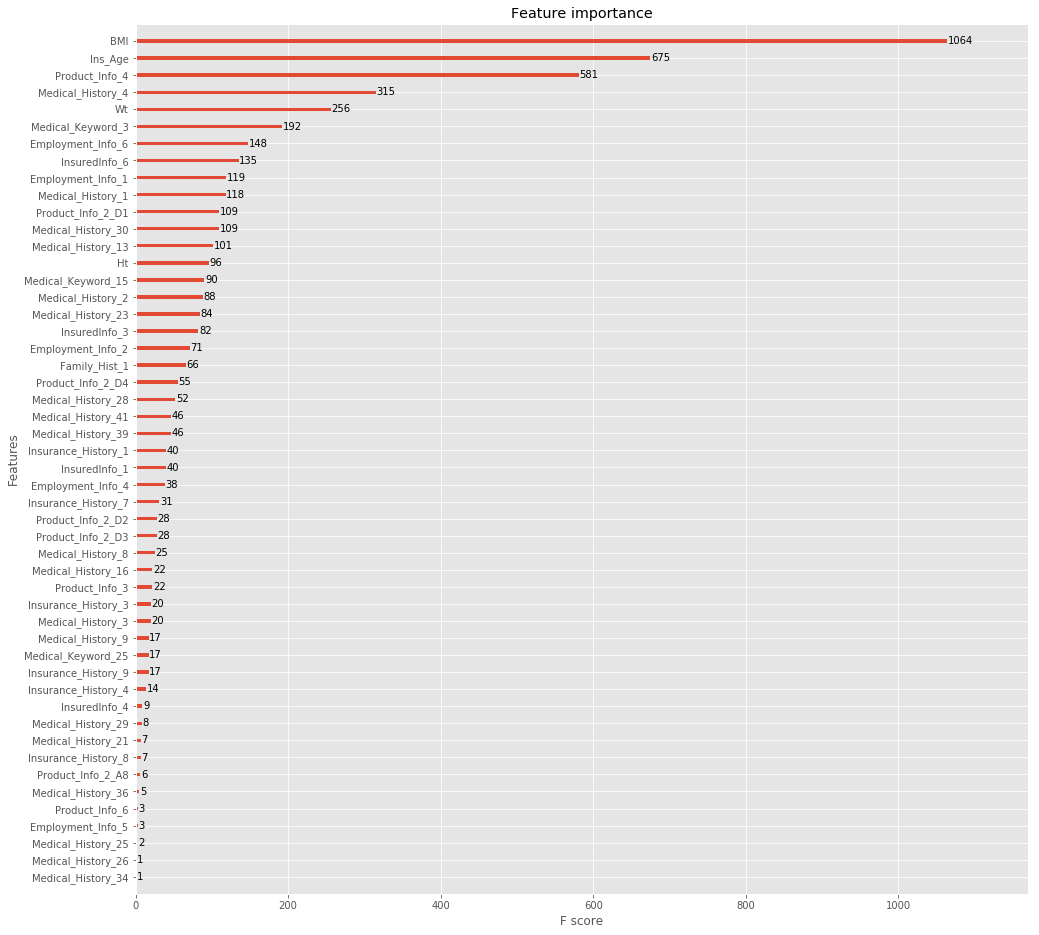

In [41]:
# First XGBoost model 



from numpy import loadtxt

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from xgboost import plot_importance

from matplotlib import pyplot



# fit model no training data

model = XGBClassifier()

model.fit(X_train, y_train)



xgb_score_train = model.score(X_train, y_train)



print("Training score: ",xgb_score_train)



xgb_score_test = model.score(X_test, y_test)



print("Testing score: ",xgb_score_test)



# plot feature importance
plt.rcParams["figure.figsize"] = (16,16)
plot_importance(model)

pyplot.show()



# make predictions for test data



#y_pred = model.predict(X_test)



#predictions = [round(value) for value in y_pred]

# evaluate predictions

#accuracy = accuracy_score(y_test, predictions)

#print("Accuracy: %.2f%%" % (accuracy * 100.0)

#### Hyper parametertuning for random forest

In [42]:
#hyper parametertuning for random forest


from sklearn.grid_search import GridSearchCV

from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features

X, y = make_classification(n_samples=1000,

                           n_features=10,

                           n_informative=3,

                           n_redundant=0,

                           n_repeated=0,

                           n_classes=2,

                           random_state=0,

                           shuffle=False)





rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 



param_grid = { 

    'n_estimators': [200, 700],

    'max_features': ['auto', 'sqrt', 'log2']

}



CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

CV_rfc.fit(X, y)

print (CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


#### RandomForestClassifier Log2

In [44]:
rfc1 = RandomForestClassifier(n_jobs=-1,max_features= 'log2' ,n_estimators=200, oob_score = True) 
rfc1.fit(X_train, y_train)
# make predictions for test data

y_pred = rfc1.predict(X_test)

predictions = [round(value) for value in y_pred]

# evaluate predictions

accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.36%


In [79]:
y_pred

array([1, 8, 2, ..., 7, 7, 5], dtype=int64)

In [80]:
Predicted_Risk = pd.DataFrame(y_pred)

,0
0,1
1,8
2,2
3,8
4,5
5,6
6,8
7,8
8,8
9,5


In [83]:
np.savetxt("Predicted_Risk.csv", y_pred, delimiter=",")